# Analysis for Continuous Improvement

Author Name: Shu Cheng Chen

9-digit PID: 730470219

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. *The course should provide corrected examples of previous quizzes because it will provide additional practice for students with no limited prior computer science experience.*
2. *The course should offer longer office hour appointments instead of tutoring because they are more helpful for most students in the class.*
3. *The course should change to synchronous because it will promote greater comprehension for students who don't find lesson videos effective.*
4. *The course should have more examples of applications of python in different fields because it will be more interesting for non-computer science students.*
5. *The course should change to a flipped class structure because it will help slow the pace for students who find the class difficult.*

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: *The course should provide corrected examples of previous quizzes because it will provide additional practice for students with no limited prior computer science experience.*


2. Suggestion for how to collect data to support this idea in the future: *Survey students on their satisfaction with the number of available resources they have for practice and how prepared they usually feel for each quiz.*

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data:3. *The course should change to synchronous because it will promote greater comprehension for students who don't find lesson videos effective.*


2. This idea is more valuable than the others brainstormed because: *it could have greater impact on the overall teaching effecitiveness of lectures and potententally reduce the need for additional ressources and personnel to aid students.*


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [19]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [20]:
from data_utils import read_csv_rows, columnar, head, select, count

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [21]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

### Reading and Transforming Data into a "Columns Dictionary Table"

Implementation of `read_csv_rows` and `columnar` to reorganize the raw data into a more accessible structure. 

In [22]:
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
data_cols: dict[str, list[str]] = columnar(data_rows)

### Narrowing the data into the columns that will be useful in this analysis.

Implementation of `select` to select columns that measure the effectiveness of lesson videos and preferences towards a synchronous class structure.

In [23]:
data_selected: dict[str, list[str]] = select(data_cols, ["sync_perf", "all_sync", "no_hybrid", "ls_effective", "understanding"])

### Filtering out related data points based on the value of a particular column

Creation and implementation of `filter`, a function that filters out survey entries based on if the value of a particular column exceeds a chosen limit.

In my analysis, the stakeholders I'm focusing on are students who don't find the lessons videos effective. Therefore based on this criteria, `filter` will filter out student entries where `"ls_effective"` is greater than `3`. In other words, when preferences towards the effectiveness of lesson videos are **Agree or Strongly Agree**.

In [24]:
from tabulate import tabulate

def filter(table: dict[str, list[str]], sorted_cat: str, sorted_int: int) -> dict[str, list[str]]:
    """Filters out data based on if the value of a particualr column exceeds a choosen value."""
    row_to_delete: list[int] = []
    for i in range(0,len(table[sorted_cat])):
        if int(table[sorted_cat][i]) > sorted_int:
            row_to_delete.append(i)
    for column in table:
        for row in reversed(row_to_delete):
            table[column].pop(row)
    return table

filter(data_selected, "ls_effective", 3)

tabulate(data_selected, data_selected.keys(), "html")

sync_perf,all_sync,no_hybrid,ls_effective,understanding
7,4,6,1,4
2,1,1,3,4
4,6,2,2,5
7,7,5,2,3
7,7,3,2,1
7,7,7,3,3
4,3,3,3,5
5,5,2,3,3
7,7,7,1,4
3,4,4,3,4


### Summarizing the student consensus towards lesson video effectiveness and class structure preference.

Implementation of `count` to calculate the distribution of preferences within each category.

Added helper function `sort` to sort each count's keys by numerical order. `../data_utils/ln(76-82)`

In [25]:
from data_utils import sort

sync_perf: dict[str, int] = count(data_selected["sync_perf"])
all_sync: dict[str, int] = count(data_selected["all_sync"])
no_hybrid: dict[str, int] = count(data_selected["no_hybrid"])
understanding: dict[str, int] = count(data_selected["understanding"])

print(f"sync_perf : {sync_perf}")
print(f"all_sync : {all_sync}")
print(f"no_hybrid : {no_hybrid}")
print(f"understanding : {understanding}")

sync_perf : {'1': 7, '2': 5, '3': 8, '4': 3, '5': 2, '6': 5, '7': 13}
all_sync : {'1': 10, '2': 4, '3': 3, '4': 6, '5': 6, '6': 4, '7': 10}
no_hybrid : {'1': 17, '2': 9, '3': 4, '4': 5, '5': 3, '6': 1, '7': 4}
understanding : {'1': 7, '2': 7, '3': 11, '4': 8, '5': 4, '7': 6}


Creation and implementation of `key_rename`, a function used to rename the dictionary's keys based on the preference they represent.

In [26]:
def key_rename(values: dict[str, int]) -> dict[str, int]:
    """Renames the keys of the dictionary based on the preference they represent."""
    i: int = 1
    result: dict[str, int] = {}
    new_names: list[str] = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]
    while i <= len(new_names):
        result[new_names[i-1]] = values[str(i)]
        i += 1
    return result

sync_perf = key_rename(sync_perf)
all_sync = key_rename(all_sync) 
no_hybrid = key_rename(no_hybrid)

# `understanding` is missing a value for key "6", causing key_rename to return an error
# reformating `understanding` to solve error issue
understanding["6"] = 0
understanding = sort(understanding)

understanding = key_rename(understanding)

print(f"sync_perf : {sync_perf}")
print(f"all_sync : {all_sync}")
print(f"no_hybrid : {no_hybrid}")
print(f"understanding : {understanding}")

sync_perf : {'Strongly Disagree': 7, 'Disagree': 5, 'Somewhat Disagree': 8, 'Neutral': 3, 'Somewhat Agree': 2, 'Agree': 5, 'Strongly Agree': 13}
all_sync : {'Strongly Disagree': 10, 'Disagree': 4, 'Somewhat Disagree': 3, 'Neutral': 6, 'Somewhat Agree': 6, 'Agree': 4, 'Strongly Agree': 10}
no_hybrid : {'Strongly Disagree': 17, 'Disagree': 9, 'Somewhat Disagree': 4, 'Neutral': 5, 'Somewhat Agree': 3, 'Agree': 1, 'Strongly Agree': 4}
understanding : {'Strongly Disagree': 7, 'Disagree': 7, 'Somewhat Disagree': 11, 'Neutral': 8, 'Somewhat Agree': 4, 'Agree': 0, 'Strongly Agree': 6}


### Visualizing processed data

Bar graphing the distribution of preferences of each selected category

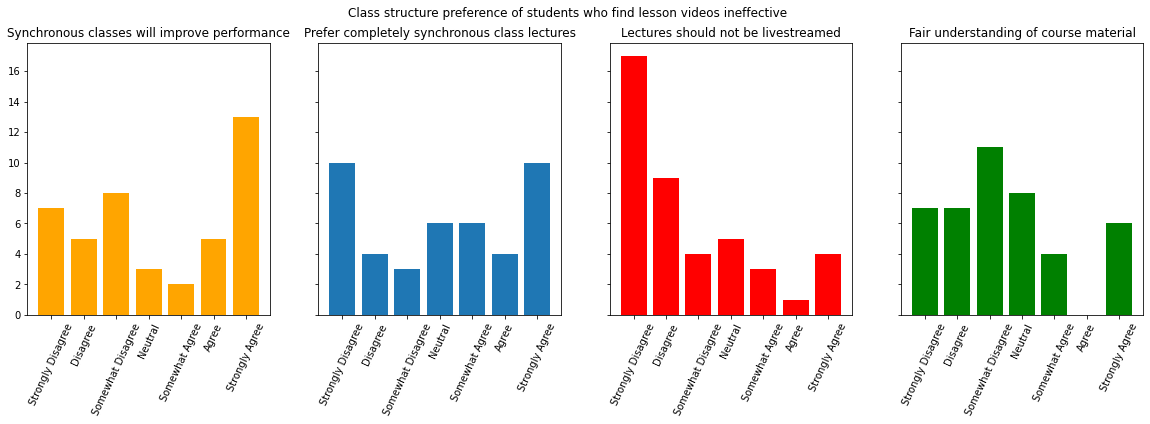

In [27]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle("Class structure preference of students who find lesson videos ineffective")


axes[0].set_title("Synchronous classes will improve performance")
axes[0].bar(sync_perf.keys(), sync_perf.values(), color=["orange"])
axes[0].tick_params(axis='x', labelrotation = 65)

axes[1].set_title("Prefer completely synchronous class lectures")
axes[1].bar(all_sync.keys(), all_sync.values())
axes[1].tick_params(axis='x', labelrotation = 65)

axes[2].set_title("Lectures should not be livestreamed")
axes[2].bar(no_hybrid.keys(), no_hybrid.values(), color=["red"])
axes[2].tick_params(axis='x', labelrotation = 65)

axes[3].set_title("Fair understanding of course material")
axes[3].bar(understanding.keys(), understanding.values(), color=["green"])
axes[3].tick_params(axis='x', labelrotation = 65)

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

In summary, among students who do not find lesson videos effective, most have a fair to poor understanding of course materials. Nevertheless, the majority of students still prefer to have lectures live-streamed and recorded. However, a slight majority of students feel that a synchronous class structure would improve their class performance. At the same time, there is inconclusive evidence that there is a preference for a completely synchronous class structure among students who do not find lesson videos effective. Therefore from this inconclusive and slightly contradicting conclusion, there is insufficient evidence to support that changing the course into synchronous lessons will benefit those who find lesson videos ineffective.

If the course were to change to solely synchronous class lectures instead of lesson videos, there might be a negative impact on a larger majority of the class who find lesson videos effective. Therefore the trade-off to helping a small minority of students who don't find lesson videos helpful is that it may cost a larger majority of the class to benefit from the potentially higher positive impact of lesson videos. I feel that this a valid conclusion.

Further data analysis could be done on the degree of effectiveness of lesson videos or hybrid class structure.